## C2DB Machine Learning

In [110]:
import pandas as pd
import numpy
import json
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

In [111]:



from ase.db import connect
count=0
db = connect('c2db.db')
formulae=[]
centerofmass=[] #array but this array has same number of elements
kineticenergy=[] #its all 0 for some reason
potentialenergy=[]
totalenergy=[]
#stress=[] #could not be found
volume=[]
pbc=[]#its an array
magmom=[] #gives the local magnetic moments
cell=[] #its an array
angularmomentum=[]
dipolemoment=[]
numberofatoms=[]
totalmagneticmoment=[]
magnetic=[]

allatoms=[]

for row in db.select():
    atoms = row.toatoms()
    allatoms.append(atoms)
    formulae.append(atoms.get_chemical_formula())
    centerofmass.append(atoms.get_center_of_mass())
    kineticenergy.append(atoms.get_kinetic_energy())
    potentialenergy.append(atoms.get_potential_energy())
    totalenergy.append(atoms.get_total_energy())
    #totalmagneticmoment.append(atoms.get_magnetic_moment())
    #stress.append(atoms.get_stress())
    volume.append(atoms.get_volume())
    pbc.append(atoms.get_pbc())
    #getting all the possible attributes stored in atoms
    magmom.append(atoms.get_initial_magnetic_moments())
    cell.append(atoms.get_cell())
    angularmomentum.append(atoms.get_angular_momentum())
    dipolemoment.append(atoms.get_dipole_moment())
    numberofatoms.append(len(atoms))
    calc= atoms.calc
    try:
        magnetic.append(calc.get_magnetic_moment())
    except:
        magnetic.append(0)

In [59]:
len(stress)

NameError: name 'stress' is not defined

In [60]:
len(magnetic)


3814

In [186]:
cell

[Cell([[3.052384420158478, 4.357010509899812e-19, 0.0], [2.4032640107519953e-17, 6.270149491823274, 0.0], [7.252342506888418e-18, 0.0, 17.10059228]]),
 Cell([[3.5203912087990332, 6.451074090772169e-18, 0.0], [2.0912468708473265e-16, 3.520626392808699, 0.0], [1.0684450446552253e-15, 1.0684450446552253e-15, 17.44903176]]),
 Cell([[3.446558586110485, 1.9705927962031412e-18, 0.0], [3.4391886335316183e-18, 3.446760794050968, 0.0], [6.33428471453608e-17, 1.1216628936742449e-35, 17.35943304]]),
 Cell([[3.9343560039987757, 6.458889306182788e-17, 0.0], [1.1896218127192216e-16, 3.958211176091227, 0.0], [-7.26418434267262e-16, 0.0, 17.77756042]]),
 Cell([[3.8951314093202756, 1.2588104409279539e-16, 0.0], [1.0486081903089668e-16, 3.8974623778984787, 0.0], [1.14231316179029e-16, 0.0, 17.827337479999997]]),
 Cell([[3.8058779313328257, -3.780751558734625e-15, 0.0], [2.2967416253971016e-15, 5.91187159853045, 0.0], [1.080636910544513e-15, 1.0806369105445115e-15, 17.648140039999998]]),
 Cell([[2.8348139

In [61]:
count=0
for row in db.select():
    atoms = row.toatoms()
    calc= atoms.calc
    try:
        gsp= calc.get_magnetic_moment()
        count= count+1
    except:
        pass

In [112]:
#in this case not taking the arrays
#lets see if later can


c2db_df= pd.DataFrame({'formula': formulae, 'potentialenergy': potentialenergy, 'totalenergy': totalenergy, 'volume': volume, 'numberofatoms': numberofatoms, 'magnetic': magnetic})

In [113]:
c2db_df.head()

,formula,potentialenergy,totalenergy,volume,numberofatoms,magnetic
0,Ag2O2,-16.112615,-16.112615,327.286639,4,0.000000
1,Co2Se2,-24.115271,-24.115271,216.262989,4,0.000000
2,Fe2S2,-27.264574,-27.264574,206.220743,4,2.923564
3,Ir2Te2,-24.926707,-24.926707,276.850160,4,0.000000
4,Nb2Se2,-29.457832,-29.457832,270.639094,4,0.000000


In [64]:
#Now we featurize in the same way that the 2dmatpedia thing was featurised

In [114]:
from pymatgen import Composition
from matminer.featurizers.composition import ElementFraction
ef= ElementFraction()



In [115]:
from matminer.featurizers.conversions import StrToComposition
stc= StrToComposition()
c2db_df= stc.featurize_dataframe(c2db_df, "formula")

In [66]:
# a venn diagram to show which features are overlapping and also maybe a separate for which 

In [116]:
df= c2db_df

In [117]:
from matminer.featurizers.composition import ValenceOrbital
vo= ValenceOrbital()
df= vo.featurize_dataframe(df, "composition")


In [118]:
df= df.dropna()
from matminer.featurizers.composition import BandCenter
bc= BandCenter()
df= bc.featurize_dataframe(df, "composition")

In [119]:
from matminer.featurizers.composition import Stoichiometry
smet= Stoichiometry()
df= smet.featurize_dataframe(df, "composition")

In [120]:
from matminer.featurizers.composition import IonProperty
ip= IonProperty()
df= ip.featurize_dataframe(df, "composition")

In [121]:
df.head()

,formula,potentialenergy,totalenergy,volume,numberofatoms,magnetic,composition,avg s valence electrons,avg p valence electrons,avg d valence electrons,...,band center,0-norm,2-norm,3-norm,5-norm,7-norm,10-norm,compound possible,max ionic char,avg ionic char
0,Ag2O2,-16.112615,-16.112615,327.286639,4,0.000000,"(Ag, O)",1.5,2.0,5.0,...,-2.576665,2,0.707107,0.629961,0.574349,0.552045,0.535887,False,0.434489,0.108622
1,Co2Se2,-24.115271,-24.115271,216.262989,4,0.000000,"(Co, Se)",2.0,2.0,8.5,...,-2.189520,2,0.707107,0.629961,0.574349,0.552045,0.535887,True,0.106157,0.026539
2,Fe2S2,-27.264574,-27.264574,206.220743,4,2.923564,"(Fe, S)",2.0,2.0,3.0,...,-2.172878,2,0.707107,0.629961,0.574349,0.552045,0.535887,True,0.131185,0.032796
3,Ir2Te2,-24.926707,-24.926707,276.850160,4,0.000000,"(Ir, Te)",2.0,2.0,8.5,...,-2.149419,2,0.707107,0.629961,0.574349,0.552045,0.535887,False,0.002497,0.000624
4,Nb2Se2,-29.457832,-29.457832,270.639094,4,0.000000,"(Nb, Se)",1.5,2.0,7.0,...,-2.019901,2,0.707107,0.629961,0.574349,0.552045,0.535887,False,0.201983,0.050496


In [73]:
#add number of magnteic atoms later
#talk about most should be independent

In [122]:
from matminer.featurizers.conversions import CompositionToOxidComposition
ctoc= CompositionToOxidComposition()
df= ctoc.featurize_dataframe(df, "composition")

In [123]:
from matminer.featurizers.composition import OxidationStates
os= OxidationStates()
df= os.featurize_dataframe(df, "composition_oxid")

In [124]:
from matminer.featurizers.composition import YangSolidSolution
mg= YangSolidSolution()
df= mg.featurize_dataframe(df, "composition")

In [92]:
see= df.columns
see

Index(['formula', 'potentialenergy', 'totalenergy', 'volume', 'numberofatoms',
       'magnetic', 'composition', 'avg s valence electrons',
       'avg p valence electrons', 'avg d valence electrons',
       'avg f valence electrons', 'frac s valence electrons',
       'frac p valence electrons', 'frac d valence electrons',
       'frac f valence electrons', 'band center', '0-norm', '2-norm', '3-norm',
       '5-norm', '7-norm', '10-norm', 'composition_oxid',
       'minimum oxidation state', 'maximum oxidation state',
       'range oxidation state', 'std_dev oxidation state', 'Yang omega',
       'Yang delta'],
      dtype='object')

In [125]:

from matminer.featurizers.composition import ElementFraction
ef= ElementFraction()
df= ef.featurize_dataframe(df, "composition")

In [126]:
df.shape

(3814, 135)

In [127]:
df.head()

,formula,potentialenergy,totalenergy,volume,numberofatoms,magnetic,composition,avg s valence electrons,avg p valence electrons,avg d valence electrons,...,Pu,Am,Cm,Bk,Cf,Es,Fm,Md,No,Lr
0,Ag2O2,-16.112615,-16.112615,327.286639,4,0.000000,"(Ag, O)",1.5,2.0,5.0,...,0,0,0,0,0,0,0,0,0,0
1,Co2Se2,-24.115271,-24.115271,216.262989,4,0.000000,"(Co, Se)",2.0,2.0,8.5,...,0,0,0,0,0,0,0,0,0,0
2,Fe2S2,-27.264574,-27.264574,206.220743,4,2.923564,"(Fe, S)",2.0,2.0,3.0,...,0,0,0,0,0,0,0,0,0,0
3,Ir2Te2,-24.926707,-24.926707,276.850160,4,0.000000,"(Ir, Te)",2.0,2.0,8.5,...,0,0,0,0,0,0,0,0,0,0
4,Nb2Se2,-29.457832,-29.457832,270.639094,4,0.000000,"(Nb, Se)",1.5,2.0,7.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#check if those columns are necessary one for each

In [ ]:
#the read me of the github has your report

In [128]:
def number_of_magnetic_atoms(formula):
    
    magnetic_atoms= ["Fe", "Co", "Dy", "Sm", "Ni", "Gd", "Nd"]
    count=0
    tr=0
    numberofmagneticatoms=[]
    
    for i in range(len(formula)):
        
        compound= formula[i]
        count=0
        
        for j in range(0, len(magnetic_atoms)):
            
            if magnetic_atoms[j] in compound:
                pos= compound.index(magnetic_atoms[j])
                if(pos+2 != len(compound)): #here each of the magnetic_atoms has a short form of 2 characters
                    if(compound[pos+2].isnumeric()):
                        count= count + int(compound[pos+2])
                    else:
                        count= count+1
                else:
                    count= count+1
                    
        numberofmagneticatoms.append(count)
        
    return numberofmagneticatoms  

In [129]:
numberofmagneticatoms= number_of_magnetic_atoms(df['formula'])
df.insert(5, "number_of_magnetic_atoms", numberofmagneticatoms, True)

In [130]:
x= df.drop(["formula", "composition", "composition_oxid", "compound possible"], axis=1)

In [131]:
x.head()

,potentialenergy,totalenergy,volume,numberofatoms,number_of_magnetic_atoms,magnetic,avg s valence electrons,avg p valence electrons,avg d valence electrons,avg f valence electrons,...,Pu,Am,Cm,Bk,Cf,Es,Fm,Md,No,Lr
0,-16.112615,-16.112615,327.286639,4,0,0.000000,1.5,2.0,5.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,-24.115271,-24.115271,216.262989,4,2,0.000000,2.0,2.0,8.5,0.0,...,0,0,0,0,0,0,0,0,0,0
2,-27.264574,-27.264574,206.220743,4,2,2.923564,2.0,2.0,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,-24.926707,-24.926707,276.850160,4,0,0.000000,2.0,2.0,8.5,7.0,...,0,0,0,0,0,0,0,0,0,0
4,-29.457832,-29.457832,270.639094,4,0,0.000000,1.5,2.0,7.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [132]:
count = (x.nunique())
print(count)
to_del = [i for i,v in enumerate(count) if v == 1]
print("Columns to delete:", to_del)

for i in range(len(to_del)):
    t= to_del[i]
    x.drop(x.columns[t-i], axis=1, inplace=True)

potentialenergy             3814
totalenergy                 3814
volume                      3763
numberofatoms                 11
number_of_magnetic_atoms       4
                            ... 
Es                             1
Fm                             1
Md                             1
No                             1
Lr                             1
Length: 132, dtype: int64
Columns to delete: [30, 32, 38, 39, 46, 64, 71, 82, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131]


In [133]:
x.shape

(3814, 89)

In [134]:
def create_bins(lower_bound, width, quantity):
    
    bins=[]
    
    for i in range(quantity):
        if i == quantity-1:
            bins.append((lower_bound+i*width, lower_bound+(i+1)*width+0.1))
        else:
            bins.append((lower_bound+i*width, lower_bound+(i+1)*width))
        
    return bins  

In [135]:
def find_bin(value, bins):
    
    for i in range(0, len(bins)):
        if bins[i][0] <= value < bins[i][1]:
            return i
    
    print("error in making bins") #it must fit in atleast one bins

In [136]:
def binning():
    
    #Using Sturge's Rule for bin calculation
    k= math.ceil(1+ math.log2(len(x)))
    column_names=list(x.columns.values)
    
    binned_x= pd.DataFrame()
    
    for i in range(len(column_names)):
        
        if(x.columns[i]=="magnetic"):
            binned_x.insert(0, x.columns[i], x[column_names[i]].tolist(), True)
            continue
        columns_into_list= x[column_names[i]].tolist()
        lower_bound= min(columns_into_list)
        upper_bound= max(columns_into_list)
        width= (upper_bound - lower_bound)/k
        bins= create_bins(lower_bound, width, k)

        t=[]
        for j in range (len(columns_into_list)):
            t.append(find_bin(columns_into_list[j], bins))
        
        binned_x.insert(0, x.columns[i], t, True)
    
    return binned_x

In [137]:
binned_x= binning()
binned_x.head()

error in making bins
error in making bins
error in making bins
error in making bins
error in making bins
error in making bins
error in making bins
error in making bins
error in making bins
error in making bins
error in making bins
error in making bins
error in making bins
error in making bins
error in making bins
error in making bins
error in making bins
error in making bins
error in making bins
error in making bins
error in making bins
error in making bins
error in making bins
error in making bins
error in making bins
error in making bins
error in making bins
error in making bins
error in making bins
error in making bins
error in making bins
error in making bins
error in making bins
error in making bins
error in making bins
error in making bins
error in making bins
error in making bins
error in making bins
error in making bins
error in making bins
error in making bins
error in making bins
error in making bins
error in making bins
error in making bins
error in making bins
error in maki

,Bi,Pb,Tl,Hg,Au,Pt,Ir,Os,Re,W,...,avg f valence electrons,avg d valence electrons,avg p valence electrons,avg s valence electrons,magnetic,number_of_magnetic_atoms,numberofatoms,volume,totalenergy,potentialenergy
0,0,0,0,0,0,0,0,0,0,0,...,0,6,5,6,0.000000,0,2,2,11,11
1,0,0,0,0,0,0,0,0,0,0,...,0,11,5,12,0.000000,6,2,1,10,10
2,0,0,0,0,0,0,0,0,0,0,...,0,3,5,12,2.923564,6,2,1,10,10
3,0,0,0,0,0,0,12,0,0,0,...,6,11,5,12,0.000000,0,2,1,10,10
4,0,0,0,0,0,0,0,0,0,0,...,0,9,5,6,0.000000,0,2,1,9,9


In [138]:
binned_x.head()

,Bi,Pb,Tl,Hg,Au,Pt,Ir,Os,Re,W,...,avg f valence electrons,avg d valence electrons,avg p valence electrons,avg s valence electrons,magnetic,number_of_magnetic_atoms,numberofatoms,volume,totalenergy,potentialenergy
0,0,0,0,0,0,0,0,0,0,0,...,0,6,5,6,0.000000,0,2,2,11,11
1,0,0,0,0,0,0,0,0,0,0,...,0,11,5,12,0.000000,6,2,1,10,10
2,0,0,0,0,0,0,0,0,0,0,...,0,3,5,12,2.923564,6,2,1,10,10
3,0,0,0,0,0,0,12,0,0,0,...,6,11,5,12,0.000000,0,2,1,10,10
4,0,0,0,0,0,0,0,0,0,0,...,0,9,5,6,0.000000,0,2,1,9,9


In [139]:
random_x= binned_x.sample(frac=1)
random= random_x.dropna()

In [140]:
y= random["magnetic"]
x= random.drop(["magnetic"], axis=1)

In [141]:
x.shape

(1900, 88)

In [142]:
random.shape

(1900, 89)

In [184]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier



clf= RandomForestClassifier()
svc= SVC()
knn= KNeighborsClassifier()
dtc= DecisionTreeClassifier()
gnb= GaussianNB()
lda= LinearDiscriminantAnalysis()
#qda= QuadraticDiscriminantAnalysis()
abc= AdaBoostClassifier()
gbc= GradientBoostingClassifier()

def machine_learning(totallength, percentagetraining, rangebegin, rangeend, normalised_x, normalised_y):
    
    y_classification=[]
    results=[]
    if (rangebegin==rangeend):
        y_classification= np.where(normalised_y==rangebegin, 0, 1)
    
    else:
        y_classification= np.where(normalised_y>= rangebegin and normalised_y<= rangeend, 0, 1)
    
    
    trainamount= math.ceil(totallength*percentagetraining/100)
    
    y_classification_train = y_classification[:trainamount]
    x_classification_train = normalised_x[:trainamount]
    y_classification_test= y_classification[trainamount:totallength]
    x_classification_test= normalised_x[trainamount:totallength]
    
    #clf.fit(x_classification_train, y_classification_train)
    #clf.predict(x_classification_test)
    #results.append(clf.score(x_classification_test, y_classification_test))
    
    svc.fit(x_classification_train, y_classification_train)
    SVC_prediction = svc.predict(x_classification_test)
    results.append(accuracy_score(SVC_prediction, y_classification_test))
    
    knn.fit(x_classification_train, y_classification_train)
    KNN_prediction = knn.predict(x_classification_test)
    results.append(accuracy_score(KNN_prediction, y_classification_test))
    
    dtc.fit(x_classification_train, y_classification_train)
    dtc_prediction = dtc.predict(x_classification_test)
    results.append(accuracy_score(dtc_prediction, y_classification_test))
    
    gnb.fit(x_classification_train, y_classification_train)
    gnb_prediction = gnb.predict(x_classification_test)
    results.append(accuracy_score(gnb_prediction, y_classification_test))
    
    lda.fit(x_classification_train, y_classification_train)
    lda_prediction = lda.predict(x_classification_test)
    results.append(accuracy_score(lda_prediction, y_classification_test))
    
    #qda.fit(x_classification_train, y_classification_train)
    #qda_prediction = qda.predict(x_classification_test)
    #results.append(accuracy_score(qda_prediction, y_classification_test))
    
    abc.fit(x_classification_train, y_classification_train)
    abc_prediction = abc.predict(x_classification_test)
    results.append(accuracy_score(abc_prediction, y_classification_test))
    
    gbc.fit(x_classification_train, y_classification_train)
    gbc_prediction = gbc.predict(x_classification_test)
    results.append(accuracy_score(gbc_prediction, y_classification_test))
    
    return results

In [185]:
percentagetraining=[99, 80, 75, 66, 50]
shape= x.shape

for i in range(len(percentagetraining)):
    print(machine_learning(shape[0], percentagetraining[i], 0, 0, x, y))

[0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.3157894736842105, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315]
[0.8447368421052631, 0.8394736842105263, 0.8263157894736842, 0.39473684210526316, 0.8342105263157895, 0.8605263157894737, 0.8605263157894737]
[0.8336842105263158, 0.8168421052631579, 0.8252631578947368, 0.391578947368421, 0.8147368421052632, 0.8378947368421052, 0.8589473684210527]
[0.8188854489164087, 0.7925696594427245, 0.8173374613003096, 0.3931888544891641, 0.8204334365325078, 0.8374613003095975, 0.8390092879256966]
[0.8084210526315789, 0.7852631578947369, 0.8105263157894737, 0.3989473684210526, 0.8168421052631579, 0.8378947368421052, 0.828421052631579]


In [150]:
shape

(1900, 88)

In [146]:
percentagetraining=66
rangeend=0
rangebegin=0
totallength= 1900
normalised_x=x
normalised_y=y

y_classification=[]
results=[]
if (rangebegin==rangeend):
    y_classification= np.where(normalised_y==rangebegin, 0, 1)
    
else:
    y_classification= np.where(normalised_y>= rangebegin and normalised_y<= rangeend, 0, 1)
trainamount= math.ceil(totallength*percentagetraining/100)
    
y_classification_train = y_classification[:trainamount]
x_classification_train = normalised_x[:trainamount]
y_classification_test= y_classification[trainamount:totallength]
x_classification_test= normalised_x[trainamount:totallength]

gbc.fit(x_classification_train, y_classification_train)
gbc_prediction = gbc.predict(x_classification_test)
print(accuracy_score(gbc_prediction, y_classification_test))
print("Confusion Matrix")
cm= confusion_matrix(gbc_prediction, y_classification_test)
print(confusion_matrix(gbc_prediction, y_classification_test))

0.8390092879256966
Confusion Matrix
[[463  78]
 [ 26  79]]


In [171]:
imp= gbc.feature_importances_
imp

array([3.17525143e-03, 0.00000000e+00, 0.00000000e+00, 6.79321576e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.02672474e-03, 0.00000000e+00, 0.00000000e+00, 1.36222732e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.99972031e-07,
       5.13038574e-03, 2.68340828e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 8.95881012e-04, 1.26248786e-03, 8.15360973e-04,
       9.05893171e-03, 1.13921521e-03, 2.63164634e-02, 3.90940772e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.03781626e-03,
       0.00000000e+00, 0.00000000e+00, 8.67806903e-04, 0.00000000e+00,
       4.22331166e-03, 0.00000000e+00, 8.66634028e-04, 4.05583739e-02,
       2.54878956e-01, 1.81932133e-01, 7.69662036e-02, 2.28115035e-02,
       3.32970669e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.58020541e-03, 0.00000000e+00, 0.00000000e+00, 5.04971095e-04,
       0.00000000e+00, 0.00000000e+00, 8.50998851e-03, 4.27385088e-03,
      

In [172]:
length= len(imp)
length

88

In [174]:
imp.sort()
imp


array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.99972031e-07, 8.18327259e-07,
       2.68340828e-04, 5.04971095e-04, 6.79321576e-04, 7.25008249e-04,
       7.55764431e-04, 8.15360973e-04, 8.66634028e-04, 8.67806903e-04,
       8.95881012e-04, 1.13921521e-03, 1.26248786e-03, 1.70890326e-03,
       1.80608995e-03, 1.90871024e-03, 2.02672474e-03, 2.28593843e-03,
       2.42373601e-03, 2.58020541e-03, 3.03465478e-03, 3.03781626e-03,
       3.17525143e-03, 3.28944872e-03, 3.32970669e-03, 3.52644164e-03,
      

In [175]:
temp= gbc.feature_importances_
positions=[]

for i in range (5):
    for j in range (len(temp)):
        if imp[87-i] == temp[j]:
            positions.append(j)

In [176]:
print(imp[length-1])
print(imp[length-2])
print(imp[length-3])
print(imp[length-4])
print(imp[length-5])
print(imp[length-6])

0.2548789556477962
0.18193213264923663
0.07696620361353797
0.04478866750425002
0.04055837392674029
0.03469738834652359


In [177]:
positions

[40, 41, 42, 83, 39]

In [178]:
columns= x.columns

In [179]:
columns[40]

'Mn'

In [180]:
columns[41]

'Cr'

In [181]:
columns[42]

'V'

In [182]:
columns[83]

'number_of_magnetic_atoms'

In [183]:
columns[39]

'Fe'

In [ ]:
x.columns

In [ ]:
#some preliminary data cleaning

In [ ]:
# the y

In [ ]:
magmom

In [ ]:
magmom[2][1]

In [ ]:
#this is again for classification algorithm 
#regression algorithm also need to see how
#confirm about the local magnetic moment

magnetic=[]
for i in range(len(magmom)):
    count=0
    for j in range(len(magmom[i])):
        if(magmom[i][j]==0):
            count= count+1
    
    if count== len(magmom[i]):
        magnetic.append(0)
    else:
        magnetic.append(1)
        
        
        
        

In [ ]:
magnetic

In [ ]:
#join the two for data cleaning

In [ ]:
x['magnetic']= magnetic

In [ ]:
x.head()

In [ ]:
#put that earilier


In [ ]:
#messed up order make that better later

In [ ]:
x.head()

In [ ]:
count = (x.nunique())
count

In [ ]:
from sklearn.feature_selection import VarianceThreshold
#figure out what this does
transform = VarianceThreshold()
transform
x= transform.fit_transform(x)

x.shape
x= pd.DataFrame(x)

In [ ]:
x.head()

In [27]:
dups = x.duplicated()
print(dups.any())

False


In [ ]:
#the actual machine learning part

In [ ]:
x.head()

In [ ]:
magnetic

In [ ]:
x.shape

In [ ]:
len(magnetic)

In [ ]:
y= magnetic

In [ ]:
y

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor(n_estimators=100)
rf.fit(x[:3000], y[:3000])

In [ ]:
df= x
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]

In [ ]:
rows_with_NaN

In [ ]:
#deleting the last column because it has a lot of NaNs

In [ ]:
x.drop(27)

In [ ]:
x.drop(3)

In [ ]:
x.head()

In [ ]:
trial= x.drop([27], axis=1)

In [ ]:
trial= trial.drop([4], axis=1)

In [ ]:
trial

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor(n_estimators=100)
rf.fit(trial[:3000], y[:3000])

In [ ]:
trial.shape

In [ ]:
y_pred= rf.predict(trial[3000:3813])
y_pred

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np
mse= mean_squared_error(y[3000:3813], y_pred)
np.sqrt(mse)

In [ ]:
#this classification algorithm is not like the previous because not localised
#so here we cannot do the greater than this is this

In [ ]:
#there should be a for loop to test this also na ideally
#what logic did you chose this with
x_classification_train= trial[:3000]
y_classification_train= y[:3000]
x_classification_test= trial[3000:3814]
y_classification_test= y[3000:3814]

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf= RandomForestClassifier()
clf.fit(x_classification_train, y_classification_train)

In [ ]:
clf.predict(x_classification_test)

In [ ]:
clf.score(x_classification_test, y_classification_test)
#keep in mind that this is for 0

In [ ]:
print(clf.feature_importances_)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

svc= SVC()
knn= KNeighborsClassifier()
svc.fit(x_classification_train, y_classification_train)
knn.fit(x_classification_train, y_classification_train)

In [ ]:
SVC_prediction = svc.predict(x_classification_test)
KNN_prediction = knn.predict(x_classification_test)

In [ ]:
print(accuracy_score(SVC_prediction, y_classification_test))
print(accuracy_score(KNN_prediction, y_classification_test))
print(confusion_matrix(SVC_prediction, y_classification_test))
print(classification_report(KNN_prediction, y_classification_test))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [ ]:
dtc= DecisionTreeClassifier()

In [ ]:
gnb= GaussianNB()
lda= LinearDiscriminantAnalysis()
qda= QuadraticDiscriminantAnalysis()
abc= AdaBoostClassifier()
gbc= GradientBoostingClassifier()

In [ ]:
dtc.fit(x_classification_train, y_classification_train)

In [ ]:
dtc_prediction = dtc.predict(x_classification_test)
print(accuracy_score(dtc_prediction, y_classification_test))

In [ ]:
gnb.fit(x_classification_train, y_classification_train)
gnb_prediction = gnb.predict(x_classification_test)
print(accuracy_score(gnb_prediction, y_classification_test))

In [ ]:
lda.fit(x_classification_train, y_classification_train)
lda_prediction = lda.predict(x_classification_test)
print(accuracy_score(lda_prediction, y_classification_test))

In [ ]:
qda.fit(x_classification_train, y_classification_train)
qda_prediction = qda.predict(x_classification_test)
print(accuracy_score(qda_prediction, y_classification_test))

In [ ]:
abc.fit(x_classification_train, y_classification_train)
abc_prediction = abc.predict(x_classification_test)
print(accuracy_score(abc_prediction, y_classification_test))

In [ ]:
gbc.fit(x_classification_train, y_classification_train)
gbc_prediction = gbc.predict(x_classification_test)
print(accuracy_score(gbc_prediction, y_classification_test))

In [ ]:
#82

In [ ]:
atoms

In [ ]:
atoms.get_initial_magnetic_moments()

In [ ]:
atoms.get_magnetic_moments()

In [ ]:
allatoms[213].get_magnetic_moment()

In [ ]:
totalmagneticmoment

In [ ]:
allatoms[213]

In [ ]:
allatoms[213].get_magnetic_moment()

In [ ]:
allatoms[200]

In [ ]:
allatoms[200].get_magnetic_moment()

In [ ]:
calc= allatoms[3813].calc

In [ ]:
calc.get_spin_polarized()

In [6]:
count=0
for row in db.select():
    atoms = row.toatoms()
    calc= atoms.calc
    try:
        gsp= calc.get_magnetic_moment()
        count= count+1
    except:
        pass
    
    

In [ ]:
count

In [ ]:
#none of them are calculated spin polarized

In [ ]:
#the ones with the total magnetic 
#so regression can be done

missing data- the try and except
noisy data:
binning
clustering


In [ ]:
x.head()

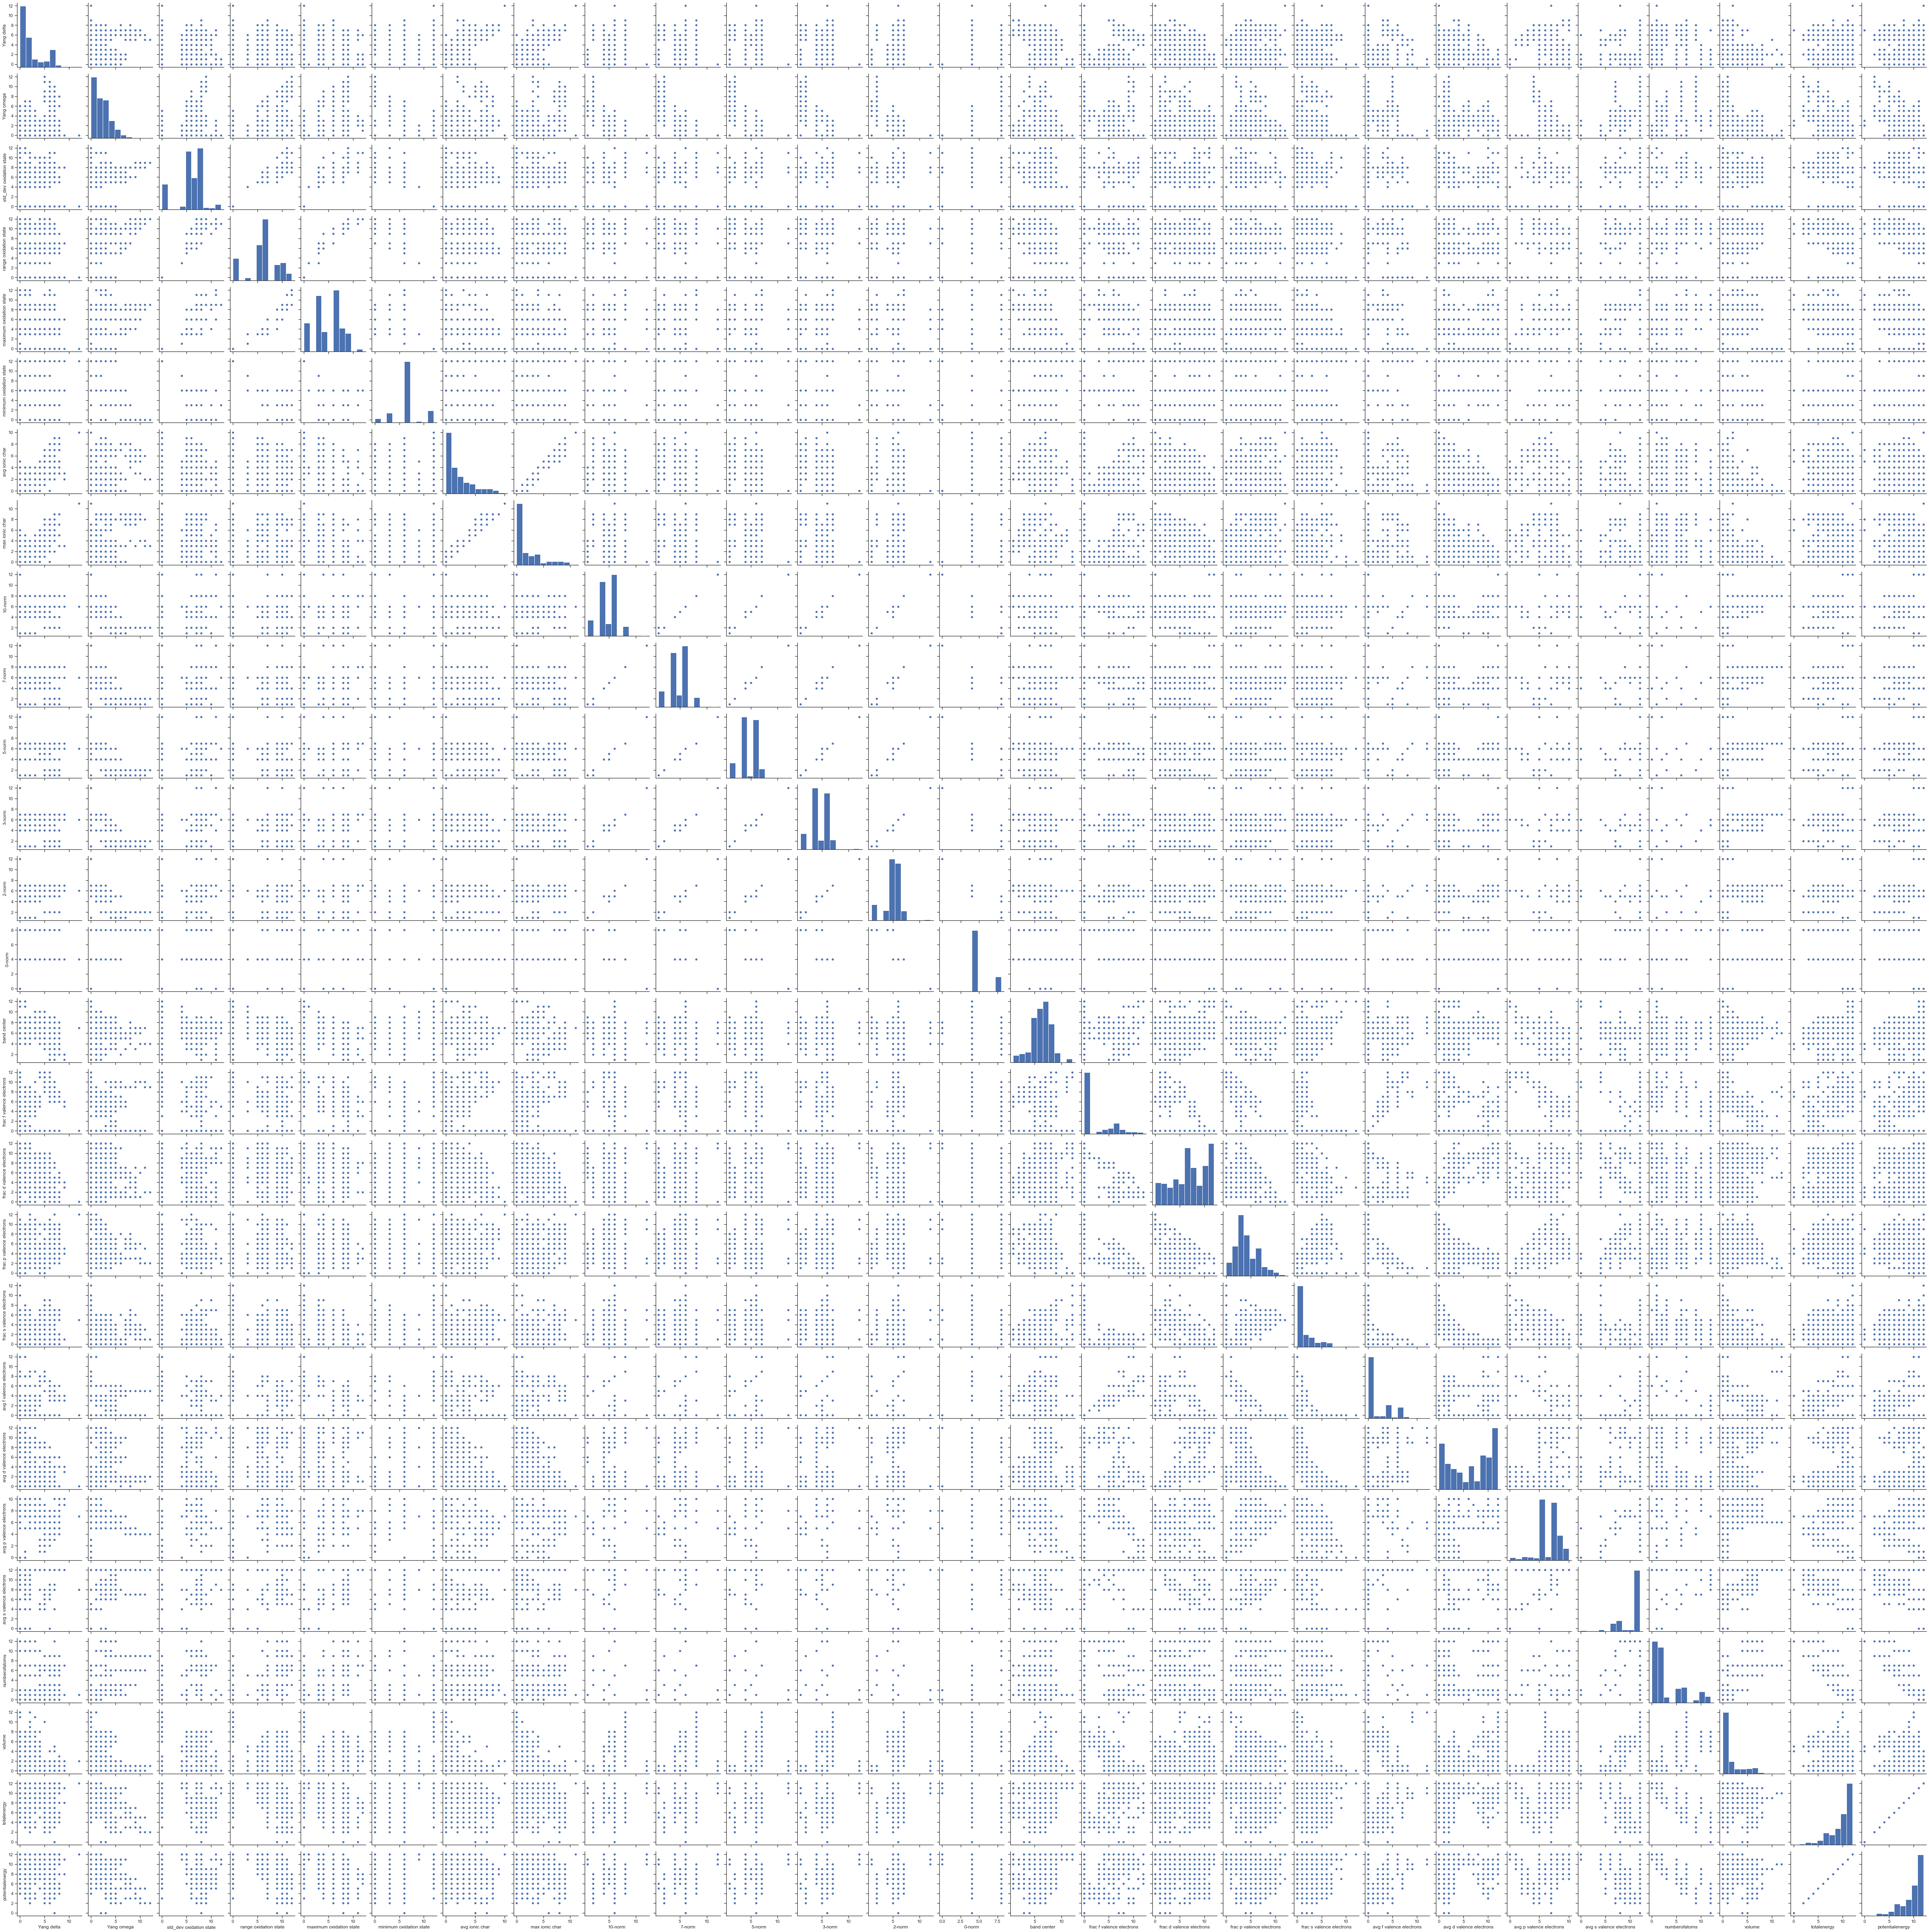

In [66]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(x)
#plt.show()
g.savefig("pairplot.png")